<a href="https://colab.research.google.com/github/ElisaVianey13/DSC/blob/main/LOG%20WEIBULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AHH.xlsx to AHH.xlsx


Parameter Weibull:
Bentuk (c): 8.1256, Lokasi: 4.1623, Skala: 0.1665

Uji Kolmogorov-Smirnov:
D = 0.1109, p-value = 0.6674
⇒ Gagal tolak H0: Data  mengikuti distribusi log-Weibull.


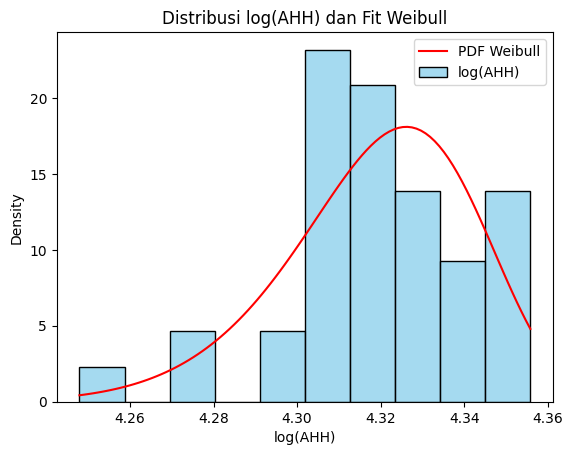

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import weibull_min, kstest
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Baca file Excel
df = pd.read_excel("AHH.xlsx")  # Sesuaikan nama file dan path jika berbeda

# 2. Ambil kolom AHH
X = df["AHH"].dropna().values  # Hilangkan NaN jika ada

# 3. Transformasi log
Y = np.log(X)

# 4. Estimasi parameter Weibull
c, loc, scale = weibull_min.fit(Y)

print("Parameter Weibull:")
print(f"Bentuk (c): {c:.4f}, Lokasi: {loc:.4f}, Skala: {scale:.4f}")

# 5. Uji Kolmogorov-Smirnov
D_stat, p_value = kstest(Y, 'weibull_min', args=(c, loc, scale))
print("\nUji Kolmogorov-Smirnov:")
print(f"D = {D_stat:.4f}, p-value = {p_value:.4f}")

# 6. Interpretasi
if p_value < 0.05:
    print("⇒ Tolak H0: Data TIDAK mengikuti distribusi log-Weibull.")
else:
    print("⇒ Gagal tolak H0: Data  mengikuti distribusi log-Weibull.")

# 7. Visualisasi
sns.histplot(Y, stat="density", bins=10, color="skyblue", label="log(AHH)")
x_vals = np.linspace(min(Y), max(Y), 100)
pdf_vals = weibull_min.pdf(x_vals, c, loc, scale)
plt.plot(x_vals, pdf_vals, 'r-', label="PDF Weibull")
plt.xlabel("log(AHH)")
plt.ylabel("Density")
plt.title("Distribusi log(AHH) dan Fit Weibull")
plt.legend()
plt.show()
